**Part1:** Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.

**Answer:** The primary objective of this assignment is to use a deep neural network to classify the Touchalytics dataset that was downloaded from the link: http://www.mariofrank.net/touchalytics/. To get the best classification accuracy I will tune the different hyper-parameters such as network architecture, learning rate, optimization algorithm, etc. Some benefits of this classification process are as follows:

- Can classify the users based on their behavioral data.

- Can find the best model architecture to get higher accuracy.

- Can compare the accuracy with the state-of-the-art accuracy for this data set. 

**Part2:** Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

**Answer:** I will be using the Touchalytics dataset for this assignment. Touchalytics collected users' touch data (up-down and left-right scrolling) when interacting with the Touchalytics app. It uses these collected touch data for user authentication. The data set has 34 columns and 21158 rows. The data set hods the behavioral data of 41 users. 

The next few lines of codes show more details about this dataset.


In [19]:
#read the downloaded data set
import pandas as pd
data=pd.read_csv('Data/data.csv')
data.head()

,ID,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34
0,37,4,0.341,0.256,27.416,-27.113,12.3980,-32.960,16.1160,0.35736,4,-2.770400,1,0.41784,4.1784,2719.20,-604000.0,-432.24,603000.0,4.1784,0.17777,0.000000,0.00000,0.124440,-2.581200,16.1320,0.99898,63.018,-432.24,0.32,0.044444,0.0,0,1
1,37,4,0.913,0.086,21.771,-30.037,9.8778,-33.867,12.4950,0.26504,4,-2.830000,1,0.00000,156.7900,502.37,-26083.0,5117.70,117000.0,265.1400,0.78867,0.000000,0.00000,0.406210,-2.199400,12.5960,0.99197,146.470,5117.70,0.60,0.088889,0.0,0,1
2,37,4,0.733,0.111,10.886,-34.169,26.9120,-34.673,16.0340,0.99118,2,-0.031436,1,32.12200,143.8500,263.58,-52140.0,-3563.50,26382.0,188.8200,-1.06510,-0.802530,-0.11658,0.000000,0.086288,16.2030,0.98959,145.970,-3563.50,0.48,0.044444,0.0,0,1
3,37,4,0.448,0.094,19.151,-34.572,12.7000,-36.790,6.8213,0.59647,4,-2.810500,1,17.36000,76.6380,230.62,-10012.0,-4604.10,25874.0,95.8570,0.60170,0.000000,0.10128,0.570430,-2.723100,6.9674,0.97902,74.122,-4604.10,0.40,0.044444,0.0,0,1
4,37,4,0.519,0.056,27.718,-32.758,14.6150,-37.294,13.8660,0.67819,4,-2.808300,1,74.82100,275.5700,993.21,-126000.0,-21377.00,217000.0,244.6800,-0.10990,-0.096714,0.00000,0.001099,-2.717000,13.8710,0.99965,247.690,-21377.00,0.44,0.044444,0.0,0,1


In [20]:
#print the number of rows and columns
print(data.shape)
print(data['ID'].nunique())

(21158, 34)
41


**Part3:** Brief summary of data exploration and actions taken for data cleaning or feature engineering.

**Answer:** Summary of data exploration are as follows:

- I checked the first few examples (rows) from the dataset to get an idea about the data.
-  Checked the number of columns and their name. Column name 'ID' represents the user identity and considered it as a target variable. 
- Checked the data type of each variable. It has both integer and floating-point data. There is no categorical variable.
- There is no duplicate row in the data set. However, some of the features have missing values.
- Checked the mean, 25%, median, 75%, and the range of all features. Here different feature has a different range.

Actions taken for the data cleaning and feature engineering are as follows:

 - Cleaned the data by replacing 'NaN' and 'Infinity' with zero.
 - According to authors columns F2, F11, and F33 represent the 'doc id', 'phone id', and 'change of finger orientation' and are not considered as features. I dropped them from the data set.
 - I split the data into training, validation, and test set. I keep separate 20% of data for testing and the rest of others for training and validation.
 - Different feature has a different range. I scaled all training and test data by StandardScaler.
 - The number of data samples in each class varies from 155-969. Here, the number of sample in some profiles are not sufficient to train a Deep Neural Network. I used SMOTE (oversampling technique) to bring profiles in the same size and to increase the data sample of the minority class.

 

In [21]:
#print the list of columns
print(data.columns.to_list())

['ID', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34']


In [22]:
#information about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21158 entries, 0 to 21157
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      21158 non-null  int64  
 1   F2      21158 non-null  int64  
 2   F3      21119 non-null  float64
 3   F4      21158 non-null  float64
 4   F5      21158 non-null  float64
 5   F6      21158 non-null  float64
 6   F7      21158 non-null  float64
 7   F8      21158 non-null  float64
 8   F9      21158 non-null  float64
 9   F10     21158 non-null  float64
 10  F11     21158 non-null  int64  
 11  F12     21158 non-null  float64
 12  F13     21158 non-null  int64  
 13  F14     21158 non-null  float64
 14  F15     21158 non-null  float64
 15  F16     21158 non-null  float64
 16  F17     20895 non-null  float64
 17  F18     20899 non-null  float64
 18  F19     20902 non-null  float64
 19  F20     21157 non-null  float64
 20  F21     21158 non-null  float64
 21  F22     21158 non-null  float64
 22

In [23]:
#chack the data duplicacy
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21153    False
21154    False
21155    False
21156    False
21157    False
Length: 21158, dtype: bool

In [24]:
#check the null value
data.isnull().sum().sort_values()

ID       0
F32      0
F31      0
F30      0
F28      0
F26      0
F25      0
F24      0
F23      0
F22      0
F21      0
F33      0
F16      0
F15      0
F34      0
F13      0
F2       0
F4       0
F5       0
F6       0
F14      0
F8       0
F7       0
F10      0
F11      0
F12      0
F9       0
F20      1
F3      39
F19    256
F29    257
F18    259
F27    262
F17    263
dtype: int64

In [25]:
#data statistics
statas=data.describe()
statas.loc['range']=statas.loc['max']-statas.loc['min']
out_fields=['mean','25%','50%','75%','range']
statas=statas.loc[out_fields]
statas.rename({'50%':'median'},inplace=True)
print(statas)

               ID        F2            F3  ...       F32  F33       F34
mean    20.442811  3.299603  6.206239e+00  ...  0.039051  0.0  1.052935
25%     10.000000  2.000000  7.790000e-01  ...  0.000000  0.0  1.000000
median  21.000000  3.000000  1.586000e+00  ...  0.000000  0.0  1.000000
75%     32.000000  5.000000  3.724000e+00  ...  0.000000  0.0  1.000000
range   40.000000  6.000000  2.060000e+06  ...  3.141600  0.0  1.000000

[5 rows x 34 columns]


In [26]:
#replace 'nan' and 'inf' by zero
import numpy as np
data=pd.DataFrame(data.replace(np.nan, 0))
data=pd.DataFrame(data.replace(np.inf, 0))
data['F19'].isnull().sum()

0

In [27]:
#drop the columns
data=data.drop(['F2','F11','F33'],axis=1)
columns=['ID','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30']
data.columns=columns
data.sample(5)

,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
611,1,1.345,1.019,28.125,-25.291,27.5800,-20.494,4.8274,0.77521,1.6839,2,1.1836,6.4125,11.452,-389.68,-42.286,556.19,3.9366,-0.38157,-2.904800e-01,-2.080200e-01,-0.14770,1.408200,5.149,0.93754,5.053,72.067,0.550000,0.155560,0.0,1
2659,2,1.499,0.082,28.016,-30.742,13.7360,-36.192,15.2860,0.60232,-2.7770,2,80.6290,204.6000,1121.400,-73971.00,-4257.100,582000.00,182.9300,1.54560,-8.880000e-16,3.603500e-01,1.44540,-2.614500,15.683,0.97467,191.250,-4257.100,0.370000,0.111110,0.0,1
5531,39,1.383,0.502,29.433,-34.666,33.3580,-14.717,20.3320,0.92017,1.3766,2,18.7230,34.7410,99.160,-2353.40,-283.790,3566.90,33.7900,-2.64080,-2.343200e+00,-2.133100e+00,-1.40000,1.331800,21.809,0.93225,43.445,-3116.100,0.490000,0.155560,0.0,1
16867,29,2.060,0.110,24.896,-35.177,7.9627,-34.774,16.9380,0.70767,3.1178,5,15.1190,161.8300,546.300,-67688.00,-3662.200,456000.00,126.9400,0.43905,-8.637000e-03,5.550000e-17,0.28214,3.139800,17.025,0.99490,154.770,-3642.600,0.094118,0.066667,0.0,1
19585,26,12.158,1.321,28.016,-40.117,27.7980,-44.150,4.0394,0.23573,-1.6248,2,3.4780,10.2780,18.664,-536.21,-30.909,450.71,8.7727,1.50920,6.054600e-01,1.088500e+00,1.28330,-0.053305,16.096,0.25095,12.185,-424.210,0.380000,0.133330,0.0,1


In [28]:
#split the training and test data set
from sklearn.model_selection import train_test_split
X=pd.DataFrame(data.drop(['ID'], axis=1))
y=data['ID']
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=42)

(21158, 30)
(21158,)


In [29]:
# standardized the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.fit_transform(X_test))

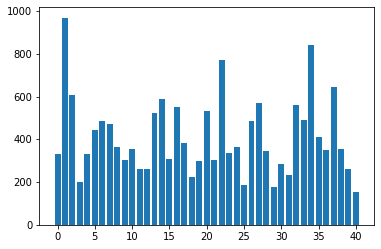

In [30]:
# summarize the size of training dataset
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	#print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

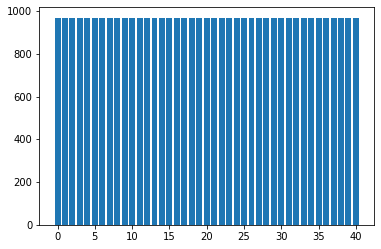

In [32]:
# oversampling a multi-class classification dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y_train)
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	#print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**Part4:** Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.

**Answer:** Here we train three different models by tuning the hyper-parameters:
- Model1: This is a shallow model where we use SGD as an optimizer and run the test for 10 epochs. The model return 66.07% training and 66.50% validation accuracy. From the training and validation loss and accuracy graph, we can say that that the model will perform well for a higher number of epochs and for a better optimizer.
- Model 2: In this Model 2 we keep the model architecture the same but use Adam optimizer and then run the test for 100 epochs. Now the training and validation accuracy increased to 98.56% and 92.55% respectively. The loss and accuracy graph shows that the model is overfitted. I will improve the model accuracy by tuning the layer as well as the changing optimizer and number of epochs.

- Model 3: In Model 3 I increase the number of layers, added the BatchNormalization layer. I introduced the dropout for Model 3. I also change the optimizer to RMSProp and set the number of the epoch as 200. After 200 epochs, the model has 94.71% training and 94.01% validation accuracy.  

In [33]:
#Deep Leatning Model1
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=12345)

y_train=to_categorical(y_train,41)
y_val=to_categorical(y_val,41)

classifier1 = Sequential()
classifier1.add(Dense(256, input_dim=30))
classifier1.add(Activation('relu'))

classifier1.add(Dense(128))
classifier1.add(Activation('relu'))

classifier1.add(Dense(41, activation='Softmax'))
 
classifier1.compile(loss='categorical_crossentropy', optimizer='SGD',metrics=['accuracy'])
history1 =  classifier1.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
559/559 [==============================] - 2s 2ms/step - loss: 3.5085 - accuracy: 0.1222 - val_loss: 3.2423 - val_accuracy: 0.2346
Epoch 2/10
559/559 [==============================] - 1s 2ms/step - loss: 2.8965 - accuracy: 0.2990 - val_loss: 2.5236 - val_accuracy: 0.3557
Epoch 3/10
559/559 [==============================] - 1s 2ms/step - loss: 2.1953 - accuracy: 0.4009 - val_loss: 1.9257 - val_accuracy: 0.4359
Epoch 4/10
559/559 [==============================] - 1s 2ms/step - loss: 1.7574 - accuracy: 0.4810 - val_loss: 1.6217 - val_accuracy: 0.5094
Epoch 5/10
559/559 [==============================] - 1s 2ms/step - loss: 1.5353 - accuracy: 0.5366 - val_loss: 1.4555 - val_accuracy: 0.5605
Epoch 6/10
559/559 [==============================] - 1s 2ms/step - loss: 1.4014 - accuracy: 0.5750 - val_loss: 1.3468 - val_accuracy: 0.5885
Epoch 7/10
559/559 [==============================] - 1s 2ms/step - loss: 1.3074 - accuracy: 0.6033 - val_loss: 1.2687 - val_accuracy: 0.6225
Epoch 

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

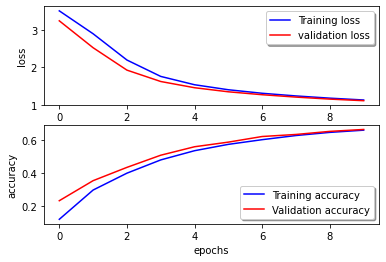

In [34]:
# Plot the classifier loss and accuracy curves for the training and validation data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set(xlabel='epochs', ylabel='loss')

ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set(xlabel='epochs', ylabel='accuracy')

In [ ]:
#Deep Learning model 2
from tensorflow.keras.optimizers import Adam

classifier2 = Sequential()
classifier2.add(Dense(256, input_dim=30))
classifier2.add(Activation('relu'))

classifier2.add(Dense(128))
classifier2.add(Activation('relu'))

classifier2.add(Dense(41, activation='Softmax'))

classifier2.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
history2 =  classifier2.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val))

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

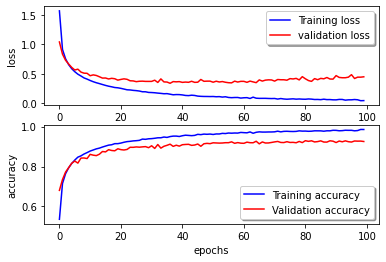

In [38]:
# Plot the classifier loss and accuracy curves for the training and validation data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history2.history['loss'], color='b', label="Training loss")
ax[0].plot(history2.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set(xlabel='epochs', ylabel='loss')

ax[1].plot(history2.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set(xlabel='epochs', ylabel='accuracy')

In [ ]:
#Deep Learning model 3
from tensorflow.keras.layers import BatchNormalization,Dropout
classifier3 = Sequential()
classifier3.add(Dense(128, input_dim=30))
classifier3.add(Activation('relu'))

classifier3.add(Dense(258))
classifier3.add(Activation('relu'))
classifier3.add(BatchNormalization())
classifier3.add(Dropout(0.25))

classifier3.add(Dense(512))
classifier3.add(Activation('relu'))
classifier3.add(BatchNormalization())
classifier3.add(Dropout(0.25))

classifier3.add(Dense(256))
classifier3.add(Activation('relu'))
classifier3.add(BatchNormalization())
classifier3.add(Dropout(0.25))

classifier3.add(Dense(128))
classifier3.add(Activation('relu'))
classifier3.add(BatchNormalization())

classifier3.add(Dense(41, activation='Softmax'))

opt=tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)
classifier3.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history3 =  classifier3.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val))

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

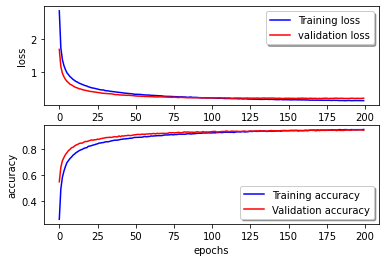

In [39]:
# Plot the classifier loss and accuracy curves for the training and validation data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history3.history['loss'], color='b', label="Training loss")
ax[0].plot(history3.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set(xlabel='epochs', ylabel='loss')

ax[1].plot(history3.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history3.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set(xlabel='epochs', ylabel='accuracy')

**Part5:** A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

**Answer:** I will suggest using Model 3 as the final model. It gives better validation and test accuracy. This makes sense why Model 3 performs better than the other two models. Here are some explanations:
 - Model 3 has deep architecture than the other two models.
 - BatchNormalization layer moved the loss function convex faster.
 - Dropout prevents the model from overfitting.
 - Altring the optimizer of the model might also help.
 - Increased the number of the epoch during the training.

**Part6:** Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

**Answer:** All the key findings and insights are as follows:

- All the features in this data set is numeric though the different feature has a different range. We bring all data in the same range. 

- The data set has some 'nan' and 'inf' values. we replace them with zero.

- Some of the classes in the data set have a lower number of data samples. We increase the class size by using the oversampling method. 

- Some models may have lower performance and some other may overfit. So, should focus on it during training the model and need to be tune the hyper-parameters.

- From the performance point of view deep model is better. For interpretability, it is better to use the shallow model.

**Part7:** Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

**Answer:**  Here is the list of suggestions for the next steps in analyzing the data.

- Reduce the dimension of the data if there are too many features. This will also help to remove the unimportant feature. In this case, we may use an autoencoder.

- If there are a limited number of features, we can create new features by combining the existing features.

- We may use other imputation approaches to replace 'nan' and 'inf'.

- We may normalize the value in [0,1] rather than standardization.

- For the imbalance class, we may try other options such as customize the loss function, add different weights in a different class.

- To remove the overfitting, we may use other approaches too such as add the plenty with the loss function. 